AMUSE tutorial on units
====================

Here we will start up an AMUSE service in Jupyter notebook and run some example operations.

In [1]:
#Load in the amuse units module
from amuse.units import units

In [2]:
import os

In [3]:
os.getcwd()

'/home/kang/Documents/AMUSE-Tutorial-09.2022'

In [4]:
# Declare some variables
mstar = 1 | units.MSun
rstar = 1 | units.RSun

In [5]:
# calculate surface escape speed
# this requires the gravitational constant to be declared
G = 6.67e-11 | units.m**3 * units.kg**-1 * units.s**-2
vesc = (2*G*mstar/rstar).sqrt()

In [6]:
# aAlternative, define G units beforehand
units_G = units.m**3 * units.kg**-1 * units.s**-2
G = 6.67e-11 | units_G
vesc = (2* G * mstar / rstar).sqrt()

In [7]:
print("The escape speed is:", vesc)

The escape speed is: 1.15498917744e-05 53476144765.21653 * m * s**-1


This looks weard, right? But it is the right answer. AMUSE will operate on "lazy calculating", meaning that it will only perform the actual calculation once it is explicitely asked for it.
Not try converting the unit to something more readable.

In [8]:
print("The escape speed is:", vesc.in_(units.kms))

The escape speed is: 617.64368455 kms


Now you have to realize, that you used the wrong value for the gravitational constant G. The values of most important constants are stored in the AMUSE framework. They can be accessed by loading in the appropriate module.

In [9]:
from amuse.units.constants import G
vesc = (2*G*mstar/rstar).sqrt()
print("The escape speed is:", vesc.in_(units.kms))

The escape speed is: 617.841817311 kms


You have now calculated the escape speed from the Solar surface.

Assignmnets and questions:
---------------

### Assignment 1:
Calculate the orbital velocity of the planet Earth in orbit around the Sun.

### Assignment 2:
Calculate the escape speed of the supermassive black hole in the Galactic center from the pericenter of S2 (the star famously used to characterize the central supermassive black hole).

### Question 1:
What is the range in velocities with which you expect an asteroids to hit the Earth's surface. Assume that there are asteroids with semimajor axes between 0 and 3.5 AU (the outer edge of the asteroid belt), with eccentricities between 0 and 0.4. Note that for an elliptic orbit, the peri- and apocenter distances are $(1\pm e)a$, and the peri- and apocenter speeds are $\sqrt{\frac{(1\pm e)\cdot GM}{(1\mp e)a}}$. Is the acceleration due to the Earth's gravitational well important?

### Question 2:
With a photospheric effective temporature of 5772K (see [Wikipedia](https://en.wikipedia.org/wiki/Sun)), what is the Sun's luminosity?
*note here that the Stefan-Bolzmann constant in AMUSE is available in the units.constants package under the name of Stefan_hyphen_Boltzmann_constant.*

Calculate the difference with the standard in AMUSE available solar luminosity (1 | units.LSun). Whay are the two values different?

If the discrepancy originates from the photospheric effective temperature from Wikipedia, what would be the correct temperature to match the Solar luminosity?

### Assignment 1

In [10]:
Rearth = 1 | units.AU
Vearth = (G * mstar / Rearth).sqrt()
print('The orbital volocity is', Vearth.in_(units.km/units.s))

The orbital volocity is 29.7884676058 km / s


### Assignment 2

In [11]:
Rperi = 120 | units.AU
MBH = 4.154 * 1e6 | units.MSun

Vesc = (2* G * MBH / Rperi).sqrt()
print('The escape velocity is', Vesc.in_(units.km/units.s))

The escape velocity is 7838.00946325 km / s


### Question 1
If the asteroid can hit the Earth, its orbit much cross the orbit of Earth. Assuming the orbit of Earch is a circle with Radius $R$, the pericenter of the asteroid must be smaller than $R$, while the apocenter must be larger than $R$. Combined with the constraints of semimojor axis $a$ and eccentricity $e$, the conditions are
\begin{equation}
\begin{aligned}
(1-e)a \leq R,\\
(1+e)a \geq R,\\
0 \leq a \leq 3.5R,\\
0 \leq e \leq 0.4.
\end{aligned}
\end{equation}
This gives the allowd range of $a$ and $e$:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

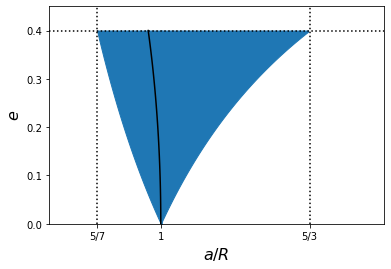

In [13]:
fig, ax = plt.subplots(1,1)
x1 = np.arange(5/7, 1.01, 0.01)
x2 = np.arange(1, 5/3, 0.01)
ax.fill_between(x=x1, y1=0.4*np.ones_like(x1), y2=1/x1-1, color='tab:blue')
ax.fill_between(x=x2, y1=0.4*np.ones_like(x2), y2=1-1/x2, color='tab:blue')
ax.plot(np.arange(0.5, 2.5, 0.1), 0.4*np.ones(20), color='k', linestyle=':')
ax.plot(5/7*np.ones(30), np.arange(30)*0.5/29, color='k', linestyle=':')
ax.plot(5/3*np.ones(30), np.arange(30)*0.5/29, color='k', linestyle=':')
y_max = np.arange(30)*0.4/29
x_max = (1-y_max**2)**(1/3)
ax.plot(x_max, y_max, color='k')
ax.set_xlim([0.5, 2.0])
ax.set_ylim([0, 0.45])
ax.set_xticks([5/7, 1, 5/3])
ax.set_xticklabels([r'5/7', 1, r'5/3'])
ax.set_yticks(np.arange(0, 0.45, 0.1))
ax.set_xlabel(r'$a/R$', fontsize=16)
ax.set_ylabel(r'$e$', fontsize=16);

The total energy (the sum of kinetic energy and gravitational potential energy) is conserved and determined by $a$. Therefore, the absolute velocity (in the solar coordinates) of the asteroid is a constant at the Earth orbit $(r=R)$. We have:
\begin{equation}
\frac{1}{2} mv^2 - \frac{GMm}{R}= -\frac{GMm}{2a}\\
v^2 = \frac{2GM}{R} - \frac{GM}{a}.
\end{equation}
Besides, the angular momentum is also conserved:
\begin{equation}
m R v_\parallel = m (1-e)a \sqrt{\frac{(1+e)GM}{(1-e)a}}\\
v_\parallel = \sqrt{\frac{(1-e^2)GMa}{R^2}}.
\end{equation}
Therefore, the perpendicular speed is
\begin{equation}
\begin{aligned}
v^2_\perp & = v^2 - v^2_\parallel\\
& = \frac{2GM}{R} - \frac{GM}{a} - \frac{(1-e^2)GMa}{R^2}.
\end{aligned}
\end{equation}
In the Earth's frame of reference, the perpendicular speed decomposition is conserved, while the parallel decomposition is different. Most of the asteroids has the same orbit direction as the Earth, thus the parallel decomposition is $v_\parallel-v_\mathrm{Earth}$. Therefore, the relative speed is
\begin{equation}
\begin{aligned}
v'^2 &= (v_\parallel-v_\mathrm{Earth})^2 + v^2_\perp\\
 &= \frac{(1-e^2)GMa}{R^2} + \frac{GM}{R} - 2\frac{GM}{R}\sqrt{\frac{(1-e^2)a}{R}} + \frac{2GM}{R} - \frac{GM}{a} - \frac{(1-e^2)GMa}{R^2}\\
 &= \frac{3GM}{R} - \frac{GM}{a} - 2\frac{GM}{R}\sqrt{\frac{(1-e^2)a}{R}}\\
 &= \frac{GM}{R}\left(3-\frac{R}{a}-2\sqrt{\frac{(1-e^2)a}{R}}\right).
\end{aligned}
\end{equation}
This increases monotonically with $e$, and if $e$ is fixed, it peaks at $a = (1-e^2)^\frac{1}{3}R$, shown as black solid curve in the above plot. Therefore, The velocity is the largest when $e=0.4$ and $a=0.6^{1/3}R$, and is the smallest when $e=0$ and $a=R$. This gives:
\begin{equation}
\begin{aligned}
0 \leq v' \leq 0.4\sqrt{\frac{GM}{R}}\\
0 \leq v' \leq 12 ~\mathrm{km}/\mathrm{s}.
\end{aligned}
\end{equation}

In the above analysis, we have neglected the gravitational potential of the Earth. The kinetic energy obtained by the asteroid at the surface of the earth is: 
$$
\frac{GM_\mathrm{Earth}}{r_\mathrm{Earth}} = 62.56 ~\mathrm{km}^2/\mathrm{s}^{2}.
$$
This is important compared with the kinetic energy in the previous equation:
\begin{equation}
\begin{aligned}
\frac{1}{2}v'^2 = 70.99 ~\mathrm{km}^2/\mathrm{s}^{2}.
\end{aligned}
\end{equation}

In [14]:
print((G * (1|units.MEarth) / (1|units.REarth)).in_(units.km**2/units.s**2))

62.56487201210584 km**2 / (s**2)


In [15]:
print((0.5*0.16*G*(1|units.MSun)/(1|units.AU)).in_(units.km**2/units.s**2))

70.98822418412199 km**2 / (s**2)


Therefore, the accurate relative velocity can be calculated as:
\begin{equation}
\begin{aligned}
\frac{1}{2}v''^2 = \frac{1}{2}v'^2 + \frac{GM_\mathrm{Earth}}{r_\mathrm{Earth}};\\
7.91 ~\mathrm{km}/\mathrm{s} \leq v'' \leq 16.34 ~\mathrm{km}/\mathrm{s}
\end{aligned}
\end{equation}

In [16]:
print((G * (1|units.MEarth) / (1|units.REarth)).sqrt().in_(units.km/units.s))

7.90979595262 km / s


In [17]:
print((0.16*G*(1|units.MSun)/(1|units.AU) + 2*G * (1|units.MEarth) / (1|units.REarth)).sqrt().in_(units.km/units.s) )

16.3433837498 km / s


If we allow the asteroid orbit in the opposite direction, the relative velocity is:
\begin{equation}
v'^2 = \frac{GM}{R}\left(3-\frac{R}{a}+2\sqrt{\frac{(1-e^2)a}{R}}\right).
\end{equation}

By doing differentiation, we find the maximum is reached at $a=(5/3)R$ and $e=0.4$. Therefore:
\begin{equation}
v''_\mathrm{max} = 65.99~\mathrm{km}/\mathrm{s}.
\end{equation}

In this case, the Earth's grativation is negligible.

In [18]:
print( (G * mstar/Rearth * (3 - 3/5 + 2*np.sqrt((1-0.4**2)*5/3)) + 2*G * (1|units.MEarth) / (1|units.REarth)).sqrt().in_(units.km/units.s) )

65.9896693371 km / s


### Question 2

The sun's luminosity is

In [23]:
TSun = 5772 | units.K
RSun = 696342 | units.km
print((units.constants.Stefan_hyphen_Boltzmann_constant * 4*np.pi*RSun**2 * TSun**4).in_(units.LSun))

0.9989779871714294 LSun .


This is very close to unity, but not the same. The difference is

In [26]:
print(1-(units.constants.Stefan_hyphen_Boltzmann_constant * 4*np.pi*RSun**2 * TSun**4).in_(units.LSun)/(1|units.LSun))

0.0010220128285706176


The difference is at $0.1\%$ level. The physical properties used are only the photospheric temperature and the radius of the Sun. Therefore, at least one is inaccurate. If the photospheric temperature is inaccurate, it should be

In [28]:
print((((1|units.LSun)/(units.constants.Stefan_hyphen_Boltzmann_constant * 4*np.pi*RSun**2))**0.25).in_(units.K))

5773.475707251949 K
